In [4]:
# 1. Imports
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import open3d as o3d
from PIL import Image

# Import your Dataset class
from datasets.ObjectFolder2 import ObjectFolder2Dataset, get_default_transform

In [5]:
# 2. Paths
DATA_DIR = "/scratch/sarai/ObjectFolder_data/processed"
PC_DIR = os.path.join(DATA_DIR, "pointclouds")
IMG_DIR = os.path.join(DATA_DIR, "RGB_images")

# 3. Create Dataset
transform = get_default_transform()
dataset = ObjectFolder2Dataset(root_dir=DATA_DIR, transform=transform)

print(f"Loaded {len(dataset)} object pairs.")

# 4. Create DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

Loaded 998 object pairs.


Point cloud batch shape: torch.Size([4, 2048, 3])
Image batch shape: torch.Size([4, 3, 224, 224])
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


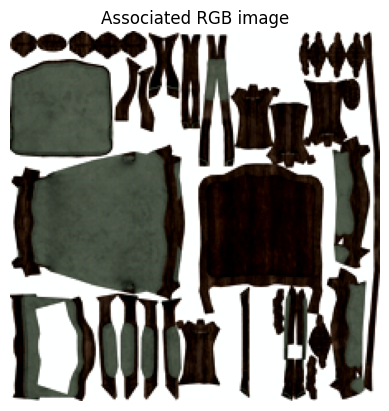

In [6]:
# 5. Visualize a batch
pointclouds, images = next(iter(dataloader))

print("Point cloud batch shape:", pointclouds.shape)  # Expected: (4, 2048, 3)
print("Image batch shape:", images.shape)             # Expected: (4, 3, 224, 224)

# 6. Plot one example
def show_example(pc, img_tensor):
    # Plot point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pc)
    o3d.visualization.draw_geometries([pcd])

    # Plot image
    img = img_tensor.permute(1, 2, 0).numpy()  # From (C, H, W) to (H, W, C)
    img = (img * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406])  # De-normalize
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.axis("off")
    plt.title("Associated RGB image")
    plt.show()

# Show first in batch
show_example(pointclouds[0].numpy(), images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.3611329].


Shape: torch.Size([2048, 3])
Min: -0.0271, Max: 0.0973
Mean: tensor([-0.0004, -0.0002,  0.0465])
Std: tensor([0.0170, 0.0171, 0.0313])


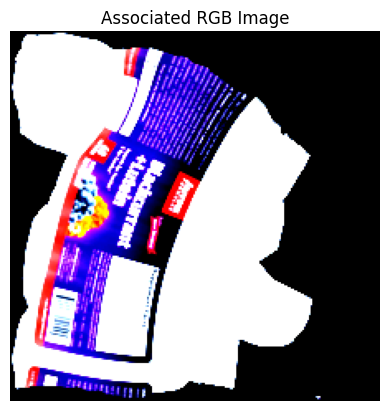

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Tomar un punto y una imagen
point_cloud, img = dataset[5]

# Mostrar info general del point cloud
print(f"Shape: {point_cloud.shape}")
print(f"Min: {point_cloud.min():.4f}, Max: {point_cloud.max():.4f}")
print(f"Mean: {point_cloud.mean(dim=0)}")
print(f"Std: {point_cloud.std(dim=0)}")

# Visualizar imagen para asegurarse que coincida
plt.imshow(img.permute(1, 2, 0))  # (C,H,W) → (H,W,C)
plt.title("Associated RGB Image")
plt.axis('off')
plt.show()


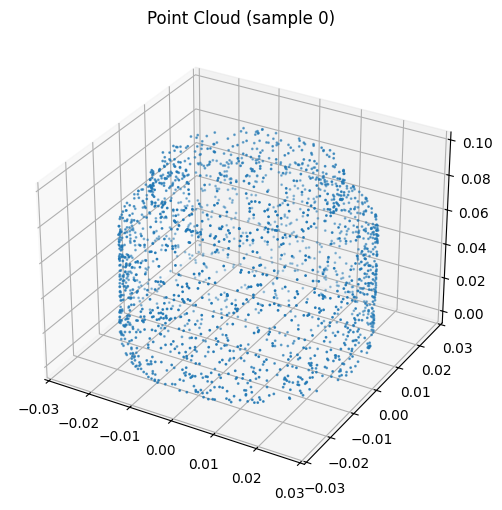

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], s=1)
ax.set_title("Point Cloud (sample 0)")
plt.show()
